In [15]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from Helper_Code import *

In [16]:
# Uploading the DataSet
DataFrames = UploadDataSet(base_directory="dataframes_list.pkl.gz")

In [17]:
X, Y = IndexToLocation(DataFrames, np.arange(18000))
X = X.values.reshape(150, 120)
Y = Y.values.reshape(150, 120)

In [18]:
df_800 = DataFrames[800]
df_800

,X,Y,U,V,Ux,Uy,Vx,Vy,vor,Umean,Vmean,Urms,Vrms,ufluc,wfluc,V16,V17
0,0.314097,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73198,0.029995,0.537474,0.151676,-3.73198,-0.029995,450.314,0.0
1,0.942293,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74550,0.033352,0.531254,0.148314,-3.74550,-0.033352,450.942,0.0
2,1.535590,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74843,0.031688,0.532074,0.148811,-3.74843,-0.031688,451.536,0.0
3,2.128890,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74622,0.029415,0.536284,0.157544,-3.74622,-0.029415,452.129,0.0
4,2.722180,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74620,0.030266,0.540452,0.162781,-3.74620,-0.030266,452.722,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,86.549700,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.28663,0.026822,0.654904,0.219418,-3.28663,-0.026822,536.550,0.0
17996,87.142900,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26842,0.021879,0.646911,0.216320,-3.26842,-0.021879,537.143,0.0
17997,87.736100,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26372,0.019525,0.647714,0.217231,-3.26372,-0.019525,537.736,0.0
17998,88.329300,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25447,0.015776,0.650972,0.218226,-3.25447,-0.015776,538.329,0.0


#### $\bullet$ Plotting U_mean

In [19]:
df_800["Umean"].max()

3.76248

In [20]:
(df_800["Umean"].min() + df_800["Umean"].max())/2

3.3397550000000003

In [21]:
df_800["Umean"].max()/df_800["Vmean"].max()

60.115230124720796

In [22]:
df_800["Umean"].min()/df_800["Vmean"].min()

-59.36077426654484

#### $\bullet$ Plotting U_mean

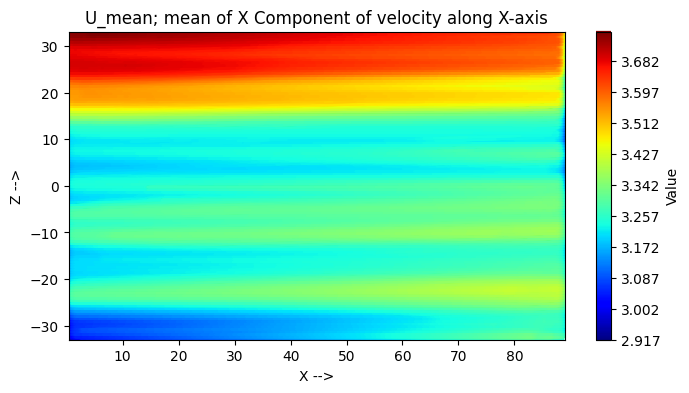

In [23]:
# Creating contour plot of U_mean
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, df_800["Umean"].values.reshape(150, 120), cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('U_mean; mean of X Component of velocity along X-axis')
plt.xlabel('X -->')
plt.ylabel('Z -->')
plt.grid(True)
plt.show()

#### $\bullet$ Plotting V_mean

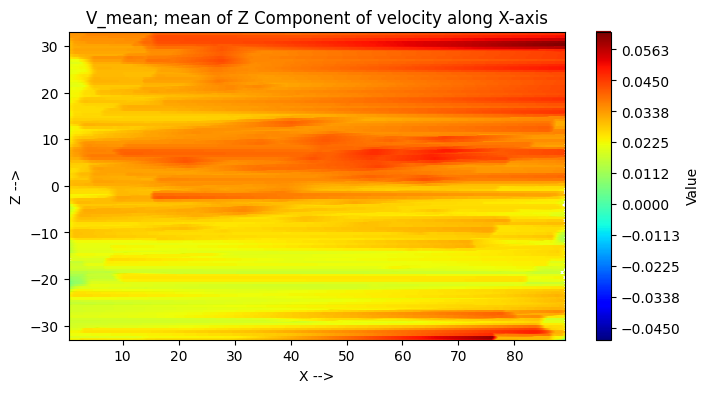

In [24]:
# Creating contour plot of V_mean
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, df_800["Vmean"].values.reshape(150, 120), cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('V_mean; mean of Z Component of velocity along X-axis')
plt.xlabel('X -->')
plt.ylabel('Z -->')
plt.grid(True)
plt.show()

#### Plot of X component of Velocity Profile

1. there are 150 points along x axis

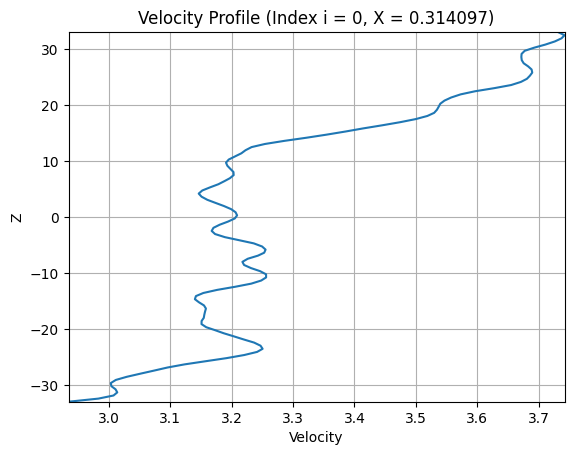

In [25]:
i = 0
df = df_800.iloc[i:150*120:150,:]

# Assuming df is your DataFrame with columns "Y" and "Umean"
Y = df['Y']
Umean = df['Umean']
X_val = df.loc[i, 'X']

plt.plot(Umean, Y)
plt.xlabel('Velocity')
plt.ylabel('Z')
plt.title(f'Velocity Profile (Index i = {i}, X = {X_val})')
plt.grid(True)

# Adjust axis limits to fit exactly to the data points
plt.xlim(np.min(Umean), np.max(Umean))
plt.ylim(np.min(Y), np.max(Y))

plt.show()

Creating a X-Velocity plot for all 120 Locations along x axis

In [26]:
# Initialize the figure
fig, ax = plt.subplots()

# Initialize an empty line
line, = ax.plot([], [], lw=2)

# Set up the axes properties
ax.set_xlabel('U_mean; Mean X-Velocity')
ax.set_ylabel('Z')
ax.set_title('Xcomponent of Mean Velocity Profile')
ax.grid(True)

# Define the update function for the animation
def update(i):
    df = df_800.iloc[i:150*120:150, :]
    Y = df['Y']
    Umean = df['Umean']
    X_val = df.loc[i, 'X']
    line.set_data(Umean, Y)
    ax.set_title(f'Mean Velocity Profile (Index of Location i = {i}, X = {X_val})')
    ax.set_xlim(df_800['Umean'].min(), df_800['Umean'].max())
    ax.set_ylim(np.min(Y), np.max(Y))
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(150), interval=100)

# Save the animation as an .mp4 file
ani.save('Animations/Umean_XComponent_velocity_profile_animation.mp4', writer='ffmpeg', dpi=600, fps = 5, bitrate=1800)

plt.show()


* Creating a Velocity ratio plot for all 120 Locations along x axis  

1. U1 $\rightarrow$ U_mean along x : for Y highest; with $U1>U2$

2. U2 $\rightarrow$ U_mean along x : for Y lowest  


$$\text{veclocity ratio, }r=\frac{U2}{U1}$$

In [ ]:
temp1 = df_800.iloc[:150,[0,9]]
temp2 = df_800.iloc[-150:,[0,9]]

Xvals = temp1["X"].values
U1 = temp1["Umean"].values
U2 = temp2["Umean"].values

# Velocity ratio
r = U2/U1

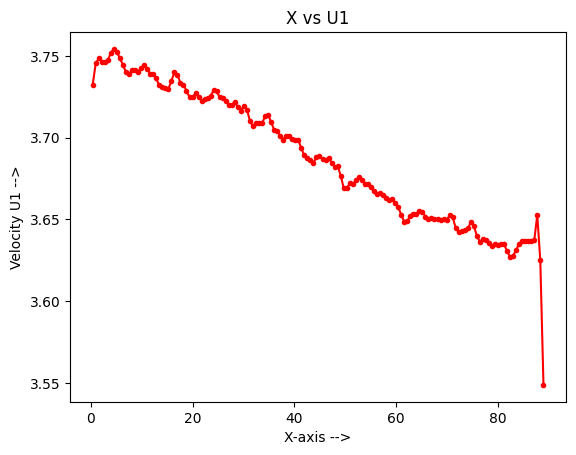

In [ ]:
plt.plot(Xvals, U1, marker='.', linestyle='-', color='r')
plt.xlabel("X-axis -->")
plt.ylabel("Velocity U1 -->")

#plt.xlim(Xvals[0], Xvals[-1])
#plt.ylim(r[0], r[-1])
plt.title("X vs U1")
plt.show()

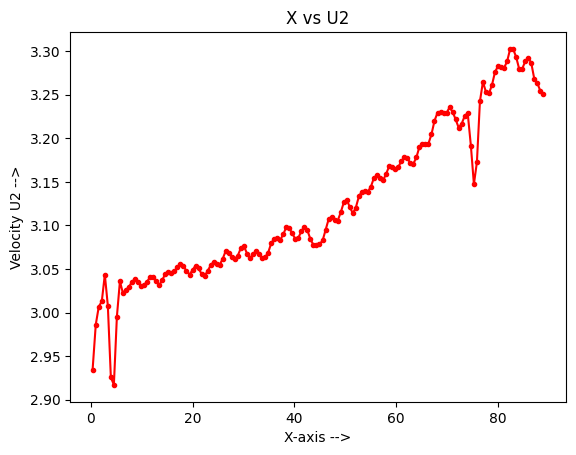

In [ ]:
plt.plot(Xvals, U2, marker='.', linestyle='-', color='r')
plt.xlabel("X-axis -->")
plt.ylabel("Velocity U2 -->")

#plt.xlim(Xvals[0], Xvals[-1])
#plt.ylim(r[0], r[-1])
plt.title("X vs U2")
plt.show()

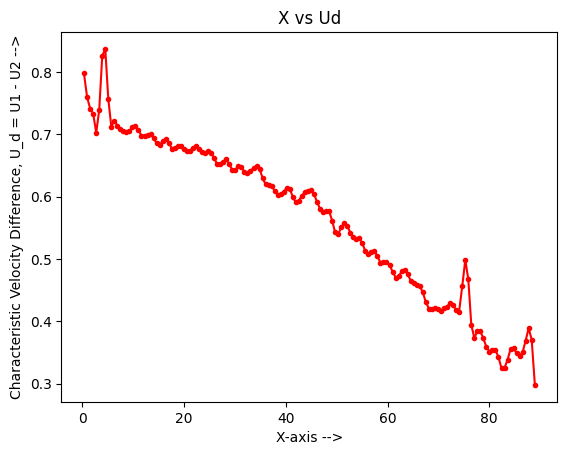

In [ ]:
# Characteristic Velocity Difference
Ud = U1-U2

plt.plot(Xvals, Ud, marker='.', linestyle='-', color='r')
plt.xlabel("X-axis -->")
plt.ylabel("Characteristic Velocity Difference, U_d = U1 - U2 -->")

#plt.xlim(Xvals[0], Xvals[-1])
#plt.ylim(r[0], r[-1])
plt.title("X vs Ud")
plt.show()

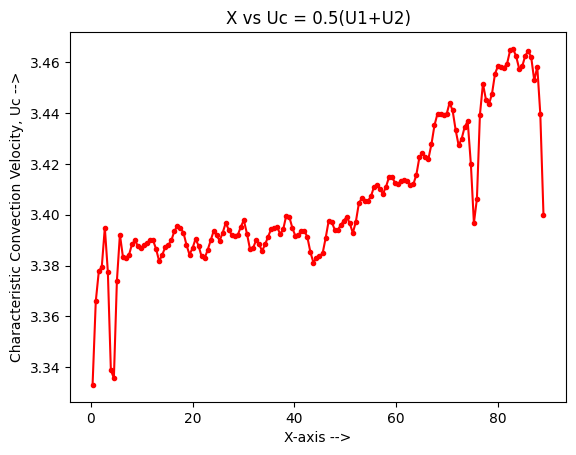

In [ ]:
# Characteristic Convection Velocity
Uc = 0.5*(U1+U2)

plt.plot(Xvals, 0.5*(U1+U2), marker='.', linestyle='-', color='r')
plt.xlabel("X-axis -->")
plt.ylabel("Characteristic Convection Velocity, Uc -->")

#plt.xlim(Xvals[0], Xvals[-1])
#plt.ylim(r[0], r[-1])
plt.title("X vs Uc = 0.5(U1+U2)")
plt.show()

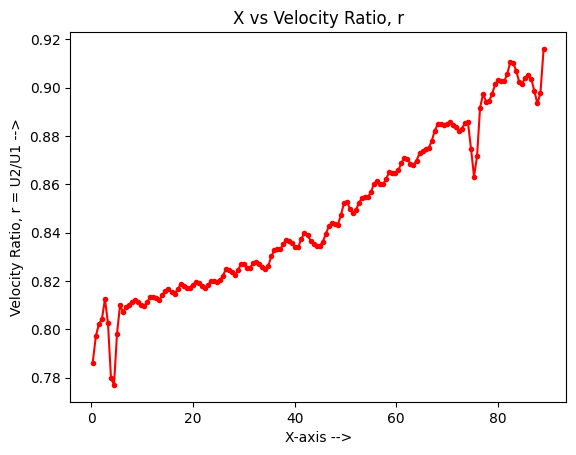

In [ ]:
plt.plot(Xvals, r, marker='.', linestyle='-', color='r')
plt.xlabel("X-axis -->")
plt.ylabel("Velocity Ratio, r = U2/U1 -->")

#plt.xlim(Xvals[0], Xvals[-1])
#plt.ylim(r[0], r[-1])
plt.title("X vs Velocity Ratio, r")
plt.show()

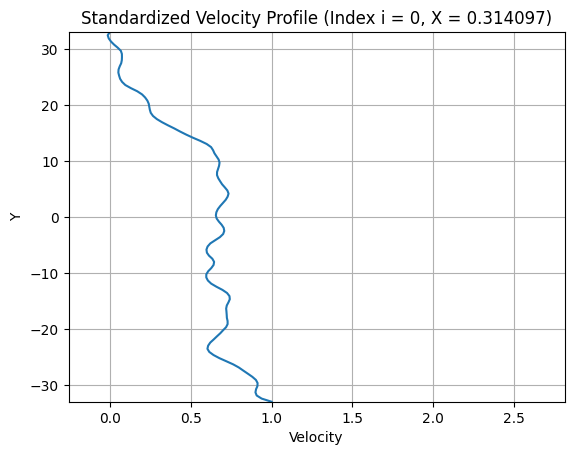

In [ ]:
i = 0
df = df_800.iloc[i:150*120:150,:]

# Assuming df is your DataFrame with columns "Y" and "Umean"
Y = df['Y']
Umean = df['Umean']
X_val = df.loc[i, 'X']

plt.plot((U1[i] - Umean)/Ud[i], Y)
plt.xlabel('Velocity')
plt.ylabel('Z')
plt.title(f'Standardized Mean Velocity Profile (Index i = {i}, X = {X_val})')
plt.grid(True)

# Adjust axis limits to fit exactly to the data points
plt.xlim((U1.min() - df_800['Umean'].max())/Ud.max() , (U1.max() - df_800['Umean'].min())/Ud.min())
plt.ylim(np.min(Y), np.max(Y))

plt.show()

Creating Standardized X-Velocity plot for all 120 Locations along x axis

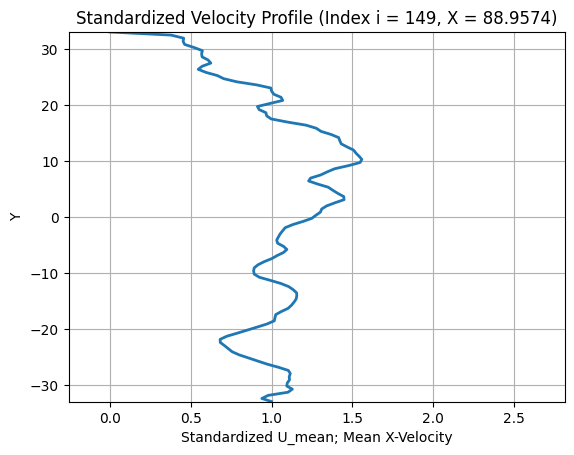

In [ ]:
# Initialize the figure
fig, ax = plt.subplots()

# Initialize an empty line
line, = ax.plot([], [], lw=2)

# Set up the axes properties
ax.set_xlabel('Standardized U_mean; Mean X-Velocity')
ax.set_ylabel('Z')
ax.set_title('Standardized Xcomponent of Mean Velocity Profile')
ax.grid(True)

# Define the update function for the animation
def update(i):
    df = df_800.iloc[i:150*120:150, :]
    Y = df['Y']
    Umean = df['Umean']
    X_val = df.loc[i, 'X']
    line.set_data(Umean, Y)
    line.set_data((U1[i] - Umean)/Ud[i], Y)
    ax.set_title(f'Standardized Mean Velocity Profile (Index i = {i}, X = {X_val})')
    ax.set_xlim((U1.min() - df_800['Umean'].max())/Ud.max() , (U1.max() - df_800['Umean'].min())/Ud.min())
    ax.set_ylim(np.min(Y), np.max(Y))
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(150), interval=100)

# Save the animation as an .mp4 file
ani.save('Animations/Standardized_U_velocity_profile_animation.mp4', writer='ffmpeg', dpi=600, fps = 5, bitrate=1800)

plt.show()


#### Plot of Y component of Velocity Profile

1. there are 150 points along x axis

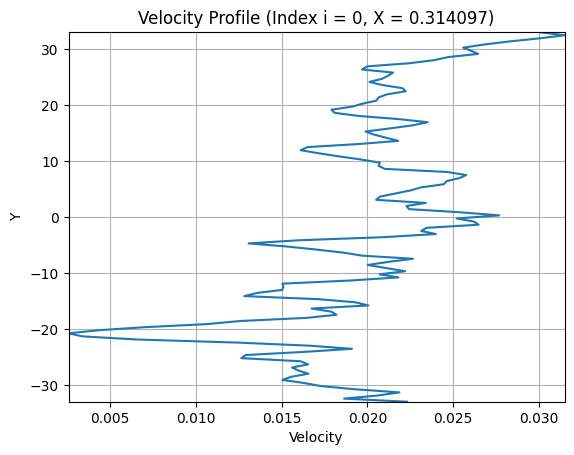

In [14]:
i = 0
df = df_800.iloc[i:150*120:150,:]

# Assuming df is your DataFrame with columns "Y" and "Umean"
Y = df['Y']
Vmean = df['Vmean']
X_val = df.loc[i, 'X']

plt.plot(Vmean, Y)
plt.xlabel('Velocity')
plt.ylabel('Y')
plt.title(f'Velocity Profile (Index i = {i}, X = {X_val})')
plt.grid(True)

# Adjust axis limits to fit exactly to the data points
plt.xlim(np.min(Vmean), np.max(Vmean))
plt.ylim(np.min(Y), np.max(Y))

plt.show()

Creating a X-Velocity plot for all 120 Locations along x axis

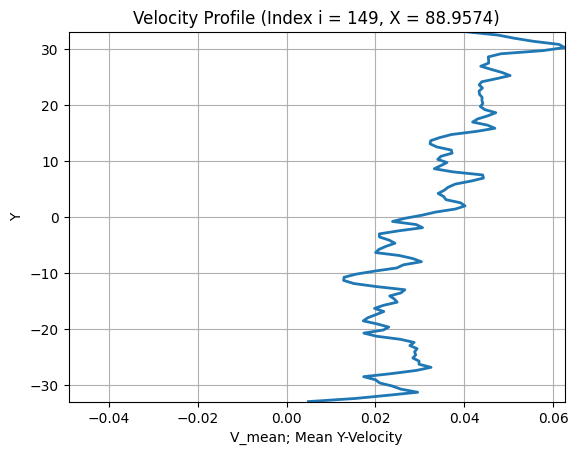

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Initialize the figure
fig, ax = plt.subplots()

# Initialize an empty line
line, = ax.plot([], [], lw=2)

# Set up the axes properties
ax.set_xlabel('V_mean; Mean Y-Velocity')
ax.set_ylabel('Y')
ax.set_title('Ycomponent of Mean Velocity Profile')
ax.grid(True)

# Define the update function for the animation
def update(i):
    df = df_800.iloc[i:150*120:150, :]
    Y = df['Y']
    Vmean = df['Vmean']
    X_val = df.loc[i, 'X']
    line.set_data(Vmean, Y)
    ax.set_title(f'Velocity Profile (Index i = {i}, X = {X_val})')
    ax.set_xlim(df_800['Vmean'].min(), df_800['Vmean'].max())
    ax.set_ylim(np.min(Y), np.max(Y))
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(150), interval=100)

# Save the animation as an .mp4 file with improved quality
ani.save('Animations/Vmean_YComponent_velocity_profile_animation.mp4', writer='ffmpeg', dpi=600, fps=5, bitrate=1800)

plt.show()


### $\bullet$ Standardizing the Cross Stream Direction

In [106]:
# Defining a Parametrized Velocity Function

U_alpha = lambda alpha: U1 - alpha*Ud

In [115]:
# U_1 holds the alpha = 0.9 Velocities 
U_1 = U_alpha(alpha = 0.9)

# U_2 holds the alpha = 0.1 Velocities
U_2 = U_alpha(alpha = 0.1)

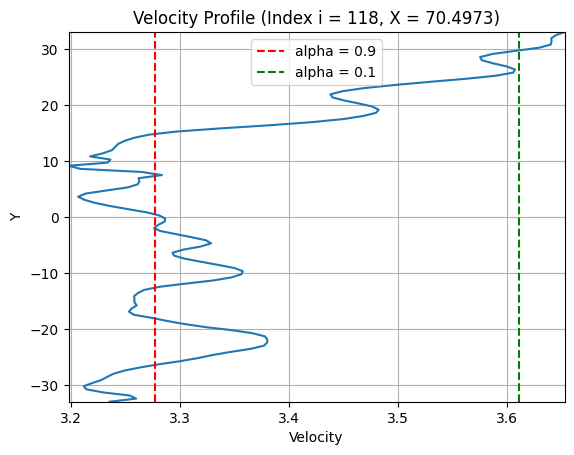

In [154]:
i = np.random.randint(150)
df = df_800.iloc[i:150*120:150,:]

# Assuming df is your DataFrame with columns "Y" and "Umean"
Y = df['Y']
Umean = df['Umean']
X_val = df.loc[i, 'X']

plt.plot(Umean, Y)
plt.xlabel('Velocity')
plt.ylabel('Y')
plt.title(f'Velocity Profile (Index i = {i}, X = {X_val})')
plt.grid(True)

# Adjust axis limits to fit exactly to the data points
plt.xlim(np.min(Umean), np.max(Umean))
plt.ylim(np.min(Y), np.max(Y))

plt.axvline(U_1[i], color = 'r', linestyle = "--", label = 'alpha = 0.9')
plt.axvline(U_2[i], color = 'g', linestyle = "--", label = 'alpha = 0.1')

plt.legend()

plt.show()